In [3]:
# Scatterpltos help with understanding relationships between multiple variables
# In the process, it can help you identify outliers
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("countries.csv")
data.head

<bound method NDFrame.head of           country continent  year  lifeExpectancy  population  gdpPerCapita
0     Afghanistan      Asia  1952          28.801     8425333    779.445314
1     Afghanistan      Asia  1957          30.332     9240934    820.853030
2     Afghanistan      Asia  1962          31.997    10267083    853.100710
3     Afghanistan      Asia  1967          34.020    11537966    836.197138
4     Afghanistan      Asia  1972          36.088    13079460    739.981106
...           ...       ...   ...             ...         ...           ...
1699     Zimbabwe    Africa  1987          62.351     9216418    706.157306
1700     Zimbabwe    Africa  1992          60.377    10704340    693.420786
1701     Zimbabwe    Africa  1997          46.809    11404948    792.449960
1702     Zimbabwe    Africa  2002          39.989    11926563    672.038623
1703     Zimbabwe    Africa  2007          43.487    12311143    469.709298

[1704 rows x 6 columns]>

In [5]:
# Lets examine the relation in 2007 (most recent year in the data)
data_2007 = data[data.year==2007]

<bound method NDFrame.head of                  country continent  year  lifeExpectancy  population  \
11           Afghanistan      Asia  2007          43.828    31889923   
23               Albania    Europe  2007          76.423     3600523   
35               Algeria    Africa  2007          72.301    33333216   
47                Angola    Africa  2007          42.731    12420476   
59             Argentina  Americas  2007          75.320    40301927   
...                  ...       ...   ...             ...         ...   
1655             Vietnam      Asia  2007          74.249    85262356   
1667  West Bank and Gaza      Asia  2007          73.422     4018332   
1679         Yemen, Rep.      Asia  2007          62.698    22211743   
1691              Zambia    Africa  2007          42.384    11746035   
1703            Zimbabwe    Africa  2007          43.487    12311143   

      gdpPerCapita  
11      974.580338  
23     5937.029526  
35     6223.367465  
47     4797.231267  


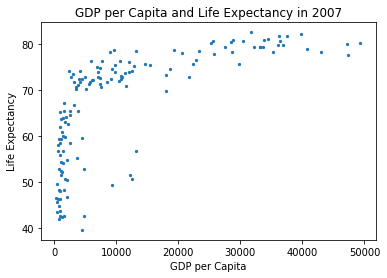

In [8]:
# Finding the relationship
# The size of the dots can be modified through a third argument in the scatter call
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title("GDP per Capita and Life Expectancy in 2007")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()

In [9]:
# We can see the positive correlation in the graph between higher GDP and a higher life expectancy
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777587

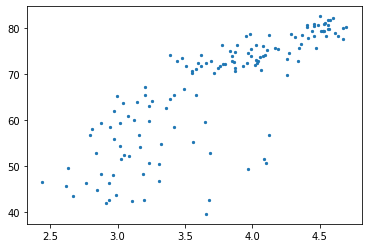

In [10]:
# From the graph we saw that the relationship is not linear, with lifeexpectancy increasing rapidly between 0 and ~6000 USD
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)
plt.show()

In [11]:
# We see that the correlation here is stronger
np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)

0.8089802514849209

In [16]:
# The correlation will now be investigated for all the years in the data
years = sorted(set(data.year))
for year in years:
    year_data = data[data.year==year]
    plt.scatter(year_data.gdpPerCapita, year_data.lifeExpectancy, 5)
    plt.xlim(0, 60000) #There is a large outlier in the set of data
    plt.ylim(25, 85)
    plt.xlabel("GDP per Capita (USD)")
    plt.ylabel("Life Expectancy")
    plt.title(year)
    plt.savefig("yearComparison/" + str(year), dpi=200) #dots per inch
    plt.clf() # Clear the plot before drawing the next plot

<Figure size 432x288 with 0 Axes>